# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement a SGD method that will train the Lasso regression for 10 epochs.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

In [37]:
import numpy as np
def reg_predict(inputs, w, b):
    results = []
    for inp in inputs:
        results.append(inp*w+b)
    return results


x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alphas = np.arange(0.1,0.9,0.1) # change here

wynik=[]
for alpha in alphas:
    w = np.linalg.inv(x.T*x + alpha * I)*x.T*y
    w=w.ravel()
    wynik.append(w)
#ze względu na małą liczność próbki nie dzielę próbki na zbiory treningowy, testowy oraz walidacyjny
mse=[]
for i in np.arange(len(alphas)):
    przewidywania=reg_predict(x[:,1],wynik[i][0,1],wynik[i][0,0])
    przewidywania=np.asarray(przewidywania).ravel()
    mse.append(np.dot(przewidywania-y.ravel(),przewidywania-y.ravel())/len(przewidywania))
    
print("Dla wybranych wartości parametru regularyzującego, przyjmując MSE jako 'quality metric' najlepsze wyniki otrzymano dla parametru \u03B1={0}.".format(alphas[np.argmin(mse)]))
print("Dla tej wartości MSE wyniosło {0}, a wyznaczone parametry regresji to a={1}, b={2}, gdzie 'a' to 'wpływ' wzrostu na wagę, a 'b' waga 'bazowa'.".format(mse[np.argmin(mse)],wynik[np.argmin(mse)][0,1],wynik[np.argmin(mse)][0,0]))

Dla wybranych wartości parametru regularyzującego, przyjmując MSE jako 'quality metric' najlepsze wyniki otrzymano dla parametru α=0.1.
Dla tej wartości MSE wyniosło 426.04507708317476, a wyznaczone parametry regresji to a=1.169787574869774, b=-101.72397080681442, gdzie 'a' to 'wpływ' wzrostu na wagę, a 'b' waga 'bazowa'.


## 2. Implement based on the Ridge regression example, the Lasso regression.

Please implement the SGD method and compare the results with the sklearn Lasso regression results. 

In [86]:
def gradient(w, X, y,alpha):
    return 2*np.matmul(np.transpose(X),np.matmul(X,w)-y)/len(y)+alpha*np.sign(w)

#def gradient_descent_step(b, X, y, lr):
#    return b-lr*gradient(b,X,y) 

def sgd(X,y,w_0,e,learning_rate,alpha,max_iter):
    poprzedni=w_0
    #print(gradient(w_0,X,y,alpha))
    nastepny=w_0-gradient(w_0,X,y,alpha)*learning_rate
    iteracje=0
    while np.sum(np.abs(nastepny-poprzedni))>e and iteracje<max_iter:
        #print(nastepny)
        poprzedni=nastepny
        nastepny=nastepny-gradient(nastepny,X,y,alpha)*learning_rate
        #nastepny[nastepny < e] = 0
        iteracje=iteracje+1
    return nastepny



In [218]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])


alpha = 0.1 
#wartości początkowe wybrane dość dowolnie, 'żeby działały'
w0 = np.array([[-50],[10]])
print(w0.shape)
w=sgd(x,y,w0,0.0001,0.00001,alpha,1000)

#w=w.flatten()
print(w)
import sklearn.linear_model as lm
model=lm.Lasso(alpha=0.1,fit_intercept=False)
wynik=model.fit(x,y)
print(wynik.coef_)

from sklearn.metrics import mean_squared_error as mse
#wynik dla naszej metody korzystającej z algorytmu subgradient descent
print(mse(y,np.matmul(x,w))+np.sum(np.abs(w)*0.1))
#wynik dla metody z biblioteki sklearn korzystającej z algorytmu coordinate descent
print(mse(y,wynik.predict(x))+np.sum(np.abs(wynik.coef_)*alpha))
#nie jest zaskakujące, że zoptymalizowana metoda z odpowiedniego pakietu otrzymała lepsze dopasowanie, natomiast uzyskany przez nas wynik jest bardzo wrażliwy na wybór parametrów początkowych, dla wyższych learning rate nie jest on zbieżny, podobnie daje on bardzo zróżnicowane wyniki w zależności od zadanych parametrów początkowych (minima lokalne?), również zaimplementowana metoda ubgradient descent nie jest optymalna i w okolicy zera daje raczej złe dopasowanie
#w tym przypadku objawia się to na przykłąd faktem, że zaczynając od dodatnich wartości wyrazu wolnego jego znak nie zmienia się w toku działania algorytmu, a główne dopasowanie następuje przez współczynnik kierunkowy

#inicjalizacja w0 losowymi zmiennymi nie przynosi lepszych rezultatów
w0=np.random.rand(2,1)
#print(np.max(x[:,1].ravel()))
w0[1,0]=np.random.randint(0,np.max(x[:,1].ravel()))
print(w0.shape)
w0.reshape(2,1)
print(w0.shape)
w=sgd(x,y,w0,0.0001,0.00001,alpha,1000)

#w=w.flatten()
print(w)
print(mse(y,np.matmul(x,w))+np.sum(np.abs(w)*alpha))

#by otrzymać lepsze rezultaty zmienne należałoby znormalizować




(2, 1)
[[-50.05192228]
 [  0.87730127]]
[-168.19471366    1.54607814]
524.0900897986381
390.6929074601503
(2, 1)
(2, 1)
[[-0.60103872]
 [ 0.59735831]]
650.894624678235


C:\Users\ksypniew\Anaconda3\lib\site-packages\sklearn\utils\validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
C:\Users\ksypniew\Anaconda3\lib\site-packages\sklearn\utils\validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
C:\Users\ksypniew\Anaconda3\lib\site-packages\sklearn\utils\validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
C:\Users\ksypniew\Anacond

## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

[ 3.21919292e+01  2.85391043e-01  2.97784462e-15 -6.14237690e-15]
[[ 0.20874182 -0.00653196  0.8621428  -0.4476358 ]
 [ 0.38620369 -0.58661055 -0.2073099   0.43764602]
 [-0.55401172  0.25256154 -0.1692528   0.48683618]
 [-0.7073504  -0.76945309 -0.4302161  -0.60916227]]
[[ 0.20874182 -0.00653196]
 [ 0.38620369 -0.58661055]
 [-0.55401172  0.25256154]
 [-0.7073504  -0.76945309]]


C:\Users\ksypniew\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ksypniew\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ksypniew\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

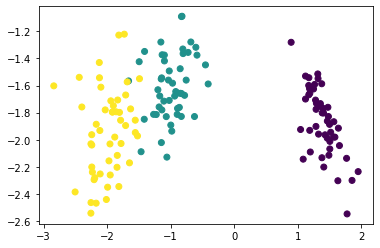

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df.head()

y=iris_data['target']
x0=iris_df[iris_data['target']==0]
x1=iris_df[iris_data['target']==1]
x2=iris_df[iris_data['target']==2]
m=np.mean(iris_df)
srednie=[]
m0=np.mean(x0)
m1=np.mean(x1)
m2=np.mean(x2)
srednie.append(m0)
srednie.append(m1)
srednie.append(m2)
#print(x0)
for s in iris_data.feature_names:
    #print(s)
    #print(m0[s])
    x0[s]=x0[s].subtract(m0[s])
    x1[s]=x1[s].subtract(m1[s])
    x2[s]=x2[s].subtract(m2[s])
    
#print(x0)
x0=x0.to_numpy()
x1=x1.to_numpy()
x2=x2.to_numpy()
S0=np.matmul(np.transpose(x0),x0)
S1=np.matmul(np.transpose(x1),x1)
S2=np.matmul(np.transpose(x2),x2)
S=S0+S1+S2

mm0=m-m0
mm1=m-m1
mm2=m-m2
mm0=mm0.to_numpy().reshape(4,1)
mm1=mm1.to_numpy().reshape(4,1)
mm2=mm2.to_numpy().reshape(4,1)
SM0=x0.shape[0]*np.matmul(mm0,np.transpose(mm0))
SM1=x1.shape[0]*np.matmul(mm1,np.transpose(mm1))
SM2=x2.shape[0]*np.matmul(mm2,np.transpose(mm2))
SM=SM0+SM1+SM2
wart_wlasne,wekt_wlasne=np.linalg.eig(np.matmul(np.linalg.inv(S),SM))
print(wart_wlasne)
print(wekt_wlasne)
#widzimy, że tylko 2 wart. własne różnią się od zera (maksymalnie 2 takie mogą być, bo mamy 3 klasy klasyfikacji), więc na tych wektorach rozpięta będzie nowa 'feature space'
w=wekt_wlasne[:,0:2]
print(w)
x=iris_df.to_numpy()
nowex=np.matmul(x,w)
plt.scatter(nowex[:,0],nowex[:,1],c=iris_data.target)
plt.show()
#widzimy, że poszczególne grupy są dobrze rozdzielone w nowej przestrzeni rozpiętej przez wektory własne odpowiadające największym wartościom własnym,
#a ponadto widać też, że drugi z nich nie wnosi wiele do rozdzielenia, co było też widać po dużo mniejszej wartości własnej mu odpowiadającej.